# Fit the DDM on individual data

In [1]:
import rlssm
import pandas as pd
import os

## Import the data

In [2]:
data = pd.read_csv('../../data/data_experiment.csv', index_col=0)
data = data[data.participant == 10].reset_index(drop=True)

data.head()

,participant,block_label,trial_block,f_cor,f_inc,cor_option,inc_option,times_seen,rt,accuracy
0,10,1,1,61,52,4,3,1,1.285418,0
1,10,1,2,54,37,4,2,1,1.577622,0
2,10,1,3,51,51,4,3,2,1.564731,0
3,10,1,4,50,35,3,1,2,1.217245,1
4,10,1,5,59,50,4,2,3,1.929781,0


## Initialize the model

In [3]:
model = rlssm.DDModel(hierarchical_levels = 1)

Using cached StanModel


## Fit

In [4]:
# sampling parameters
n_iter = 500
n_chains = 2
n_thin = 1

In [5]:
model_fit = model.fit(data,
                      print_diagnostics=False,
                      thin = n_thin,
                      iter_warmup = n_iter,
                      iter_sampling = n_iter,
                      chains = n_chains)

INFO:cmdstanpy:CmdStan start processing


Fitting the model using the priors:
drift_priors {'mu': 1, 'sd': 5}
threshold_priors {'mu': 0, 'sd': 5}
ndt_priors {'mu': 0, 'sd': 5}


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

INFO:cmdstanpy:CmdStan done processing.


### get Rhat

In [6]:
model_fit.rhat

,rhat,variable
name,,
lp__,1.0,lp__
drift,1.0,drift
threshold,1.0,threshold
ndt,1.0,ndt
drift_ll[1],1.0,drift_ll[1]
...,...,...
log_lik[235],1.0,log_lik[235]
log_lik[236],1.0,log_lik[236]
log_lik[237],1.0,log_lik[237]


### get wAIC

In [7]:
model_fit.waic

{'lppd': -247.53837554860468,
 'p_waic': 3.8272480956105936,
 'waic': 502.73124728843055,
 'waic_se': 28.306440385979574}

## Posteriors

In [8]:
model_fit.samples.describe()

,transf_drift,transf_threshold,transf_ndt
count,1000.000000,1000.000000,1000.000000
mean,0.636244,1.789958,0.800467
std,0.079723,0.057457,0.011031
min,0.391133,1.616290,0.753198
25%,0.580719,1.747450,0.793475
50%,0.635735,1.790030,0.801206
75%,0.688748,1.830705,0.808053
max,0.941068,1.981550,0.828349


In [9]:
import seaborn as sns
sns.set(context = "talk", 
        style = "white", 
        palette = "husl",
        rc={'figure.figsize':(15, 8)})

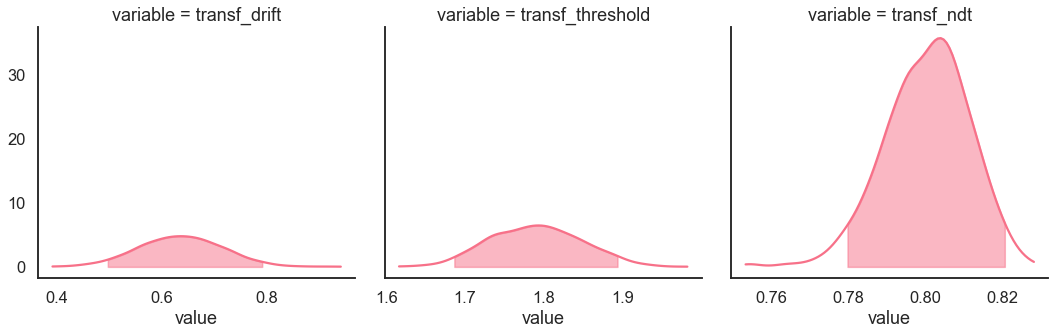

In [10]:
model_fit.plot_posteriors(height=5, show_intervals="HDI", alpha_intervals=.05);

## Posterior predictives

### Ungrouped

In [11]:
pp = model_fit.get_posterior_predictives_df(n_posterior_predictives=100)
pp

variable        rt                                                    \
trial          1         2         3         4         5         6     
sample                                                                 
1         1.878355  1.862355  0.970355  1.442355  1.627355  1.282355   
2         1.305295  3.523295  1.449295  1.692295  1.108295  2.157295   
3         1.511778  0.971778  1.645778  1.229778  1.138778  2.182778   
4         1.535929  1.341929  1.171929  2.841929  1.037929  1.420929   
5         2.274614  0.962614  1.653614  1.402614  2.480614  3.406614   
...            ...       ...       ...       ...       ...       ...   
96        1.108882  1.208882  1.100882  3.337882  3.355882  1.259882   
97        1.496156  1.029156  1.011156  1.115156  1.705156  0.987156   
98        1.202652  1.108652  1.255652  0.900652  1.416652  2.799652   
99        1.564616  1.521616  1.688616  1.247616  1.650616  1.305616   
100       0.972052  0.974052  2.019052  1.740052  3.239052  1.004052   

variable                                          ... accuracy                 \
trial          7         8         9         10   ...      230  231  232  233   
sample                                            ...                           
1         1.026355  1.238355  1.689355  1.119355  ...      0.0  0.0  1.0  1.0   
2         1.596295  3.976295  1.516295  1.310295  ...      1.0  1.0  0.0  1.0   
3         0.975778  2.145778  1.259778  0.886778  ...      1.0  1.0  0.0  1.0   
4         1.367929  1.430929  1.038929  1.275929  ...      1.0  0.0  0.0  0.0   
5         2.474614  1.554614  1.012614  1.426614  ...      1.0  1.0  1.0  1.0   
...            ...       ...       ...       ...  ...      ...  ...  ...  ...   
96        1.436882  1.718882  2.373882  1.162882  ...      1.0  1.0  1.0  1.0   
97        0.999156  1.548156  1.480156  1.078156  ...      1.0  1.0  1.0  1.0   
98        1.157652  1.004652  1.099652  1.724652  ...      1.0  1.0  1.0  1.0   
99        1.176616  1.636616  1.259616  1.772616  ...      1.0  1.0  1.0  0.0   
100       1.145052  1.901052  1.019052  1.191052  ...      0.0  1.0  1.0  0.0   

variable                                
trial     234  235  236  237  238  239  
sample                                  
1         1.0  1.0  0.0  0.0  1.0  1.0  
2         1.0  1.0  1.0  1.0  1.0  1.0  
3         1.0  0.0  1.0  1.0  1.0  1.0  
4         1.0  1.0  1.0  1.0  1.0  1.0  
5         1.0  1.0  1.0  1.0  1.0  1.0  
...       ...  ...  ...  ...  ...  ...  
96        1.0  1.0  1.0  0.0  1.0  1.0  
97        1.0  1.0  1.0  1.0  1.0  1.0  
98        1.0  1.0  1.0  1.0  1.0  1.0  
99        1.0  1.0  1.0  0.0  1.0  1.0  
100       1.0  1.0  1.0  0.0  1.0  1.0  

[100 rows x 478 columns]

In [12]:
pp_summary = model_fit.get_posterior_predictives_summary(n_posterior_predictives=100)
pp_summary

,mean_accuracy,mean_rt,skewness,quant_10_rt_low,quant_30_rt_low,quant_50_rt_low,quant_70_rt_low,quant_90_rt_low,quant_10_rt_up,quant_30_rt_up,quant_50_rt_up,quant_70_rt_up,quant_90_rt_up
sample,,,,,,,,,,,,,
1,0.774059,1.604171,2.035518,1.098755,1.284355,1.442855,1.887955,3.024455,1.008555,1.187355,1.378355,1.730555,2.284755
2,0.769874,1.661688,1.502668,0.991295,1.176095,1.389295,1.782695,2.272695,1.018595,1.184795,1.429295,1.977595,2.690195
3,0.794979,1.433268,2.721577,0.995378,1.104178,1.229778,1.425178,1.741378,0.965678,1.129178,1.294278,1.483778,2.136878
4,0.736402,1.549314,1.827070,0.961529,1.089529,1.258929,1.585529,2.341529,1.012429,1.164429,1.435929,1.685429,2.296929
5,0.786611,1.607560,1.594750,1.099614,1.183614,1.361614,1.628614,2.101614,1.014314,1.215614,1.442114,1.792914,2.479414
...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,0.744770,1.534317,1.456779,1.007882,1.153882,1.293882,1.851882,2.411882,1.016582,1.194582,1.386882,1.653782,2.230782
97,0.799163,1.492671,1.982070,1.047656,1.212656,1.380156,1.679556,2.147456,1.027156,1.153156,1.322156,1.593156,2.105156
98,0.748954,1.506472,2.073365,1.057352,1.146052,1.336152,1.599452,2.075752,1.007252,1.148052,1.331652,1.545452,2.248252


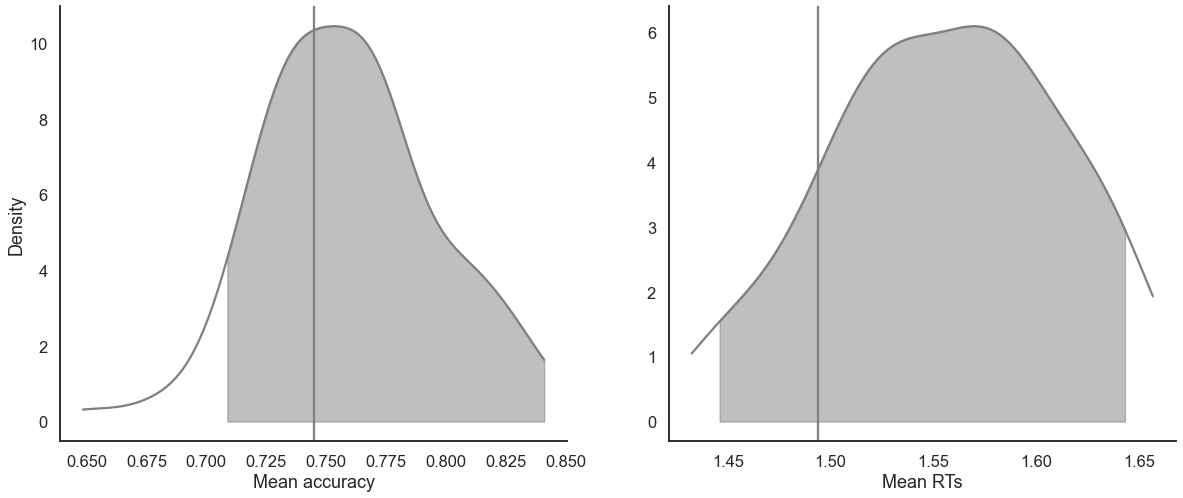

In [13]:
model_fit.plot_mean_posterior_predictives(n_posterior_predictives=100, figsize=(20,8), show_intervals='HDI');

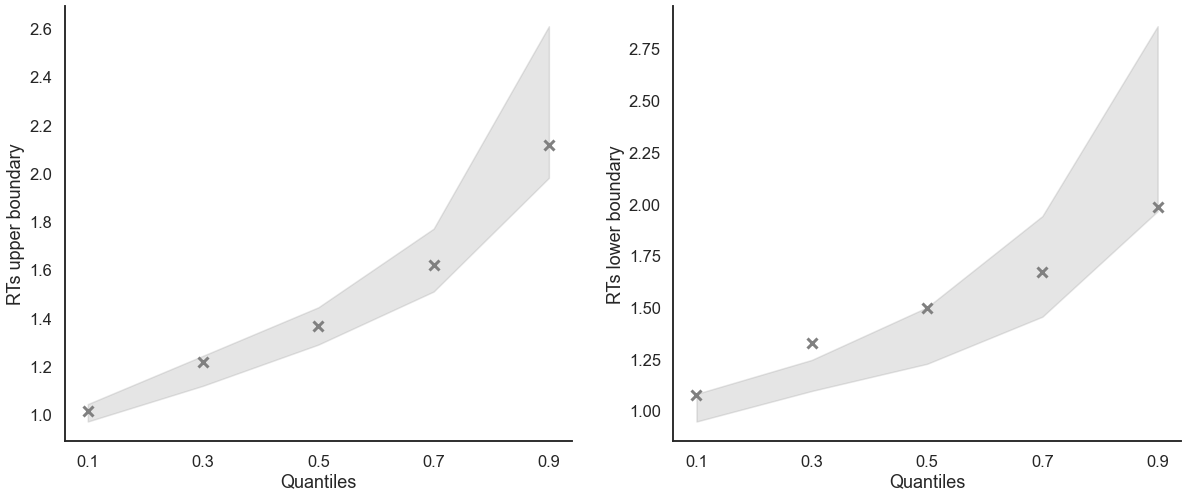

In [14]:
model_fit.plot_quantiles_posterior_predictives(n_posterior_predictives=100, kind='shades');

### Grouped

In [15]:
import numpy as np

In [16]:
# Define new grouping variables, in this case, for the different choice pairs, but any grouping var can do
data['choice_pair'] = 'AB'
data.loc[(data.cor_option == 3) & (data.inc_option == 1), 'choice_pair'] = 'AC'
data.loc[(data.cor_option == 4) & (data.inc_option == 2), 'choice_pair'] = 'BD'
data.loc[(data.cor_option == 4) & (data.inc_option == 3), 'choice_pair'] = 'CD'

data['block_bins'] = pd.cut(data.trial_block, 8, labels=np.arange(1, 9))

In [17]:
model_fit.get_grouped_posterior_predictives_summary(
                grouping_vars=['block_label', 'choice_pair'],
                quantiles=[.3, .5, .7],
                n_posterior_predictives=100)

mean_accuracy   mean_rt  skewness  \
block_label choice_pair sample                                      
1           AB          1                0.85  1.616405  2.795052   
                        2                0.80  1.749545  1.630675   
                        3                0.65  1.237978  1.996103   
                        4                0.50  1.699579  1.097094   
                        5                0.80  1.340964  1.294889   
...                                       ...       ...       ...   
3           CD          96               0.80  1.458082  2.300463   
                        97               0.80  1.568456  1.706021   
                        98               0.80  1.476702  0.894461   
                        99               0.85  1.498266  2.175636   
                        100              0.80  1.567002  1.246198   

                                quant_30_rt_low  quant_30_rt_up  \
block_label choice_pair sample                                    
1           AB          1              1.117355        1.157355   
                        2              1.274995        1.332295   
                        3              1.131978        1.049578   
                        4              1.282629        1.160329   
                        5              1.090514        1.133614   
...                                         ...             ...   
3           CD          96             0.977182        1.203382   
                        97             0.896756        1.229656   
                        98             1.441452        1.102652   
                        99             1.298816        1.120816   
                        100            1.167052        1.247052   

                                quant_50_rt_low  quant_50_rt_up  \
block_label choice_pair sample                                    
1           AB          1              1.189355        1.431355   
                        2              1.758295        1.424795   
                        3              1.182778        1.193778   
                        4              1.607929        1.273429   
                        5              1.315614        1.294114   
...                                         ...             ...   
3           CD          96             1.043382        1.398882   
                        97             0.974656        1.394656   
                        98             1.555152        1.383652   
                        99             1.463616        1.250616   
                        100            1.227052        1.437552   

                                quant_70_rt_low  quant_70_rt_up  
block_label choice_pair sample                                   
1           AB          1              1.385355        1.637355  
                        2              2.294895        1.650295  
                        3              1.201178        1.256978  
                        4              2.179629        1.447529  
                        5              1.586014        1.384114  
...                                         ...             ...  
3           CD          96             1.130682        1.571382  
                        97             1.095856        1.855156  
                        98             1.709852        1.576652  
                        99             1.477216        1.482216  
                        100            1.421752        1.750052  

[1200 rows x 9 columns]

In [18]:
model_fit.get_grouped_posterior_predictives_summary(
                grouping_vars=['block_bins'],
                quantiles=[.3, .5, .7],
                n_posterior_predictives=100)

mean_accuracy   mean_rt  skewness  quant_30_rt_low  \
block_bins sample                                                       
1          1            0.600000  1.390255  1.371238         1.213355   
           2            0.766667  1.462128  2.029001         1.151895   
           3            0.600000  1.594611  1.385289         1.330178   
           4            0.866667  1.516696  0.542255         1.191329   
           5            0.766667  1.564847  1.948504         1.291614   
...                          ...       ...       ...              ...   
8          96           0.655172  1.523296  0.995245         1.464282   
           97           0.689655  1.539225  0.768124         1.180956   
           98           0.862069  1.456445  1.804929         1.132252   
           99           0.896552  1.622409  1.423911         1.204616   
           100          0.724138  1.749811  1.380482         1.050552   

                   quant_30_rt_up  quant_50_rt_low  quant_50_rt_up  \
block_bins sample                                                    
1          1             1.123855         1.240855        1.209855   
           2             1.121495         1.259295        1.219295   
           3             1.309478         1.770778        1.387278   
           4             1.172929         1.399929        1.350929   
           5             1.244614         1.349614        1.431614   
...                           ...              ...             ...   
8          96            1.182882         1.631882        1.253882   
           97            1.159556         1.400156        1.473656   
           98            1.223852         1.204652        1.346652   
           99            1.187116         1.208616        1.606616   
           100           1.166052         1.558552        1.527052   

                   quant_70_rt_low  quant_70_rt_up  
block_bins sample                                   
1          1              1.648955        1.380055  
           2              1.597895        1.406695  
           3              1.898878        1.470078  
           4              1.618229        1.825429  
           5              1.765814        1.607014  
...                            ...             ...  
8          96             1.794482        1.520082  
           97             1.724756        1.843356  
           98             1.279152        1.569852  
           99             1.327816        1.806116  
           100            1.934252        1.739052  

[800 rows x 9 columns]

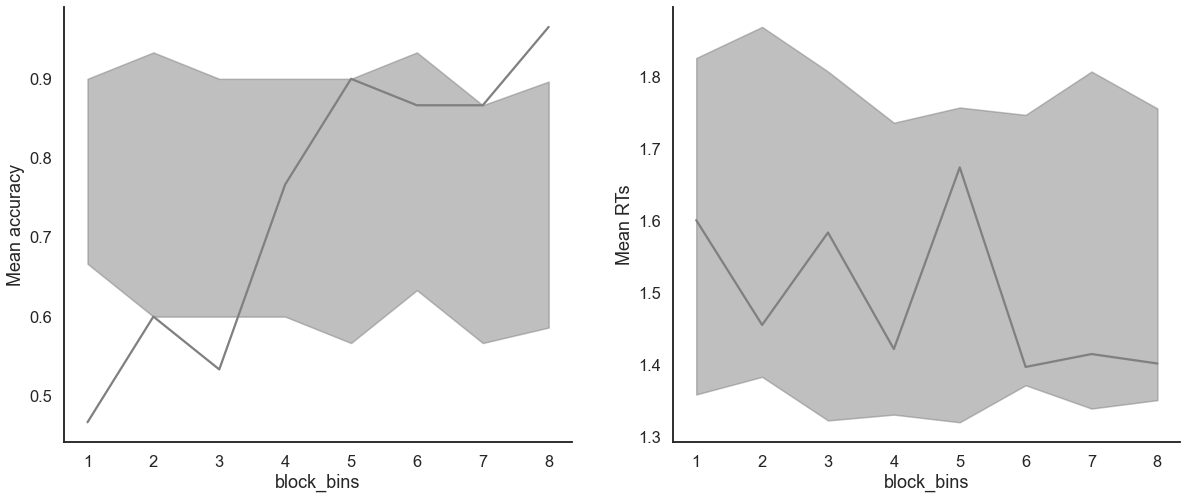

In [19]:
model_fit.plot_mean_grouped_posterior_predictives(grouping_vars=['block_bins'], 
                                                  n_posterior_predictives=100, 
                                                  figsize=(20,8));

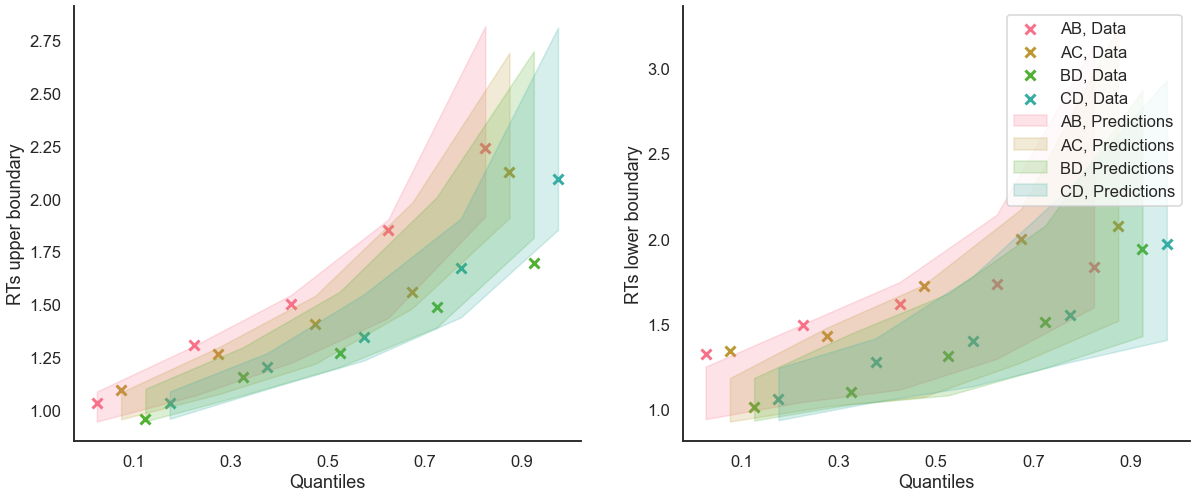

In [20]:
model_fit.plot_quantiles_grouped_posterior_predictives(
    n_posterior_predictives=100,
    grouping_var='choice_pair',
    kind='shades',
    quantiles=[.1, .3, .5, .7, .9]);